# LAB 11 A – Ehab, subset sum and eight queens problems


> Edison Camilo Huérfano Villalba




1


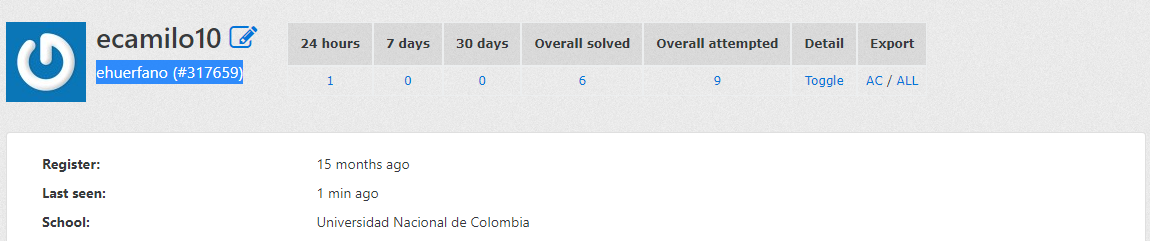

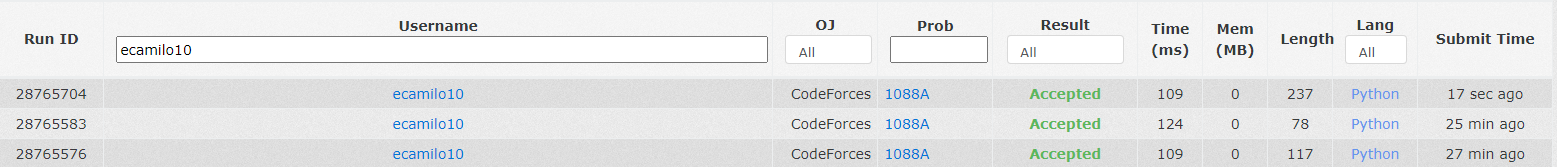

In [1]:
flag = False
x = int(input())
for a in range(1,x + 1):
  for b in range(1,x + 1):
    if ((a%b)==0 and (a*b)>x and (a/b)<x):
      flag = True
      print(str(a)+" "+str(b))
      break
    if flag:
      break
if not(flag): 
  print("-1")

10
4 4


In [2]:
x = int(input())
if (x%2 ==0):
  print(str(x)+" "+str(2))
else:
  flag = False
  for a in range(1,x + 1):
    for b in range(1,x + 1):
      if ((a%b)==0 and (a*b)>x and (a/b)<x):
        flag = True
        print(str(a)+" "+str(b))
        break
      if flag:
        break
  if not(flag):
    print("-1")

10
10 2


In [3]:
x = int(input())
if (x==1):
  print(-1)
else:
  print(str(x-(x%2))+" "+str(2))

10
10 2


2

In [4]:
import signal


class TimeoutError(Exception):
    def __init__(self, value="Timed Out"):
        self.value = value

    def __str__(self):
        return repr(self.value)


def timeout(seconds_before_timeout):
    def decorate(f):
        def handler(signum, frame):
            raise TimeoutError()

        def new_f(*args, **kwargs):
            old = signal.signal(signal.SIGALRM, handler)
            signal.alarm(seconds_before_timeout)
            try:
                result = f(*args, **kwargs)
            finally:
                signal.signal(signal.SIGALRM, old)
            signal.alarm(0)
            return result

        new_f.func_name = f.func_name
        return new_f

    return decorate

In [5]:
import itertools



@timeout(5 * 60)
def bruteforce(x_list, target):
    possiblities = []
    for x in powerset(x_list):
        possiblities.append((x, sum(x)))

    x_list, actual_value = closest(possiblities, target)

    return (actual_value, x_list)


def powerset(iterable):
    '''powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    http://docs.python.org/library/itertools.html#recipes
    '''
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s) + 1))


def closest(possiblities, target):
    '''Modified from http://stackoverflow.com/questions/445782/finding-closest-match-in-collection-of-numbers/445824#445824'''
    return min((abs(target - total), (o_list, total))
               for o_list, total in possiblities)[1]

AttributeError: ignored